# Setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = './retail_data/'

In [2]:
# 제품목록 gds_list_0, gds_list_1
gds_0 = pd.read_csv(base_path + 'gds_list_0.csv')
gds_1 = pd.read_csv(base_path + 'gds_list_1.csv')

# 제품 카테고리 목록: gdsclss_list_0, gdsclss_list_1
gdsclss_0 = pd.read_csv(base_path + 'gdsclss_list_0.csv')
gdsclss_1 = pd.read_csv(base_path + 'gdsclss_list_1.csv')

# 매장 목록: str_list
str_list = pd.read_csv(base_path + 'str_list.csv')

# 매출 데이터 마스터(장바구니 단위): tr_list_0, tr_list_1
tr_list_0 = pd.read_csv(base_path + 'tr_list_0_convert.csv')
tr_list_1 = pd.read_csv(base_path + 'tr_list_1_convert.csv')

# 매출 제품 데이터 상세: tr_dtl_list_0, tr_dtl_list_1
tr_dtl_list_0 = pd.read_csv(base_path + 'tr_dtl_list_0.csv')
tr_dtl_list_1 = pd.read_csv(base_path + 'tr_dtl_list_1.csv')

/var/folders/mg/5qhb3mc5753c3s8vxx1t9c680000gn/T/ipykernel_87928/866183216.py:13: DtypeWarning: Columns (2,11) have mixed types. Specify dtype option on import or set low_memory=False.
  tr_list_0 = pd.read_csv(base_path + 'tr_list_0_convert.csv')
/var/folders/mg/5qhb3mc5753c3s8vxx1t9c680000gn/T/ipykernel_87928/866183216.py:17: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  tr_dtl_list_0 = pd.read_csv(base_path + 'tr_dtl_list_0.csv')


# 본문

## 제품 목록: gds_list_0, gds_list_1
* CO_CD: 회사 코드
* STR_CD: 매장 코드
* PLU_CD: 제품 코드로 880으로 시작하는 바코드도 있지만 매장에서 직접 생성하여 등록한 코드가 혼재
* GDS_NM: 제품 명
* GDS_CLSS_CD: 제품 카테고리 코드(자세한 코드 구조는 제품 카테고리 데이터 참조)
* GDS_TP_NM: 제품 구분으로 [일반/저울상품/사이드상품/원타임/공병/배송료]로 구분
* VEN_CD: 제품 공급사 코드로 매장에서 관리하는 번호기 때문에 다른 매장 간 같은 코드로 중복되더라도 다른 제품 공급사일 수 있음

In [6]:
gds_0

,CO_CD,STR_CD,PLU_CD,GDS_NM,GDS_CLSS_CD,GDS_TP_NM,VEN_CD
0,1001294,12018,1,배송비,999999,배송료,0
1,1001294,12018,2,사은행사쿠폰,999999,배송료,0
2,1001294,12018,91770,코지유리물병,93331,일반,0
3,1001294,12018,91770,크지물병,91701,일반,0
4,1001294,12018,50390427,POM석류,12579,일반,0
...,...,...,...,...,...,...,...
102668,1001739,72005,9901234001249,그린매실주통,20301,일반,30
102669,1001739,72005,9901345698772,담배케이스스틸,20301,일반,30
102670,1001739,72005,9902345678771,9902345678771등록,70202,일반,30
102671,1001739,72005,990891,ok캐쉬백 포인트,70101,일반,37


In [7]:
len(gds_0['GDS_NM'].value_counts().index)

86014

## 제품 카테고리 목록: gdsclss_list_0, gdsclss_list_1

* CO_CD: 회사 코드
* STR_CD: B/C/D마트는 000000으로 표기되고 A마트만 A마트의 매장코드가 표시됨(A마트는 다점포회사 소속으로 매장마다 카테고리 구분하여 관리)
* GDS_CLSS_CD: 제품 카테고리 코드로 2자리, 4자리, 6자리로 구성, 6자리 코드의 앞 4자리와 4자리 코드의 앞 2자리는 각 상위 카테고리의 코드
* GDS_CLSS_NM: 제품 카테고리 명
* GDS_CLSS_LVL_TP: 카테고리 Level로 1/2/3으로 표시
* UP_GDS_CLSS_CD: 상위 카테고리 코드
* GDS_CLSS_GRP_TP: 카테고리 구분으로 1은 공산품, 2는 식자재, 3은 신선식품(실수로 연결을 못해서 코드 그대로 표시)

In [8]:
gdsclss_0

,CO_CD,STR_CD,GDS_CLSS_CD,GDS_CLSS_NM,GDS_CLSS_LVL_TP,UP_GDS_CLSS_CD,GDS_CLSS_GRP_TP
0,1001294,12018,1,식품,1,0,1
1,1001294,12018,101,가공농산물,2,1,1
2,1001294,12018,10151,가공농산물,3,101,1
3,1001294,12018,10152,김치류,3,101,1
4,1001294,12018,10153,소스,3,101,1
...,...,...,...,...,...,...,...
767,1001739,0,1401,수입류,2,14,1
768,1001739,0,140101,수입류,3,1401,1
769,1001739,0,99,기타,1,0,1
770,1001739,0,9999,기타중분류,2,99,1


In [26]:
gdsclss_0.CO_CD.value_counts()

1001294    607
1001739    165
Name: CO_CD, dtype: int64

In [27]:
gdsclss_0.GDS_CLSS_NM.value_counts()

기타        16
식품        14
쓰레기봉투      7
야채         6
비식품        6
          ..
새우         1
멸치         1
육포         1
조미 오징어     1
기타소분류      1
Name: GDS_CLSS_NM, Length: 515, dtype: int64

In [28]:
gdsclss_0.groupby("GDS_CLSS_NM").GDS_CLSS_CD.nunique().nlargest()

GDS_CLSS_NM
기타       16
식품       14
쓰레기봉투     7
건어물       6
계란        6
Name: GDS_CLSS_CD, dtype: int64

In [29]:
gdsclss_0[gdsclss_0.GDS_CLSS_NM == "쓰레기봉투"]

,CO_CD,STR_CD,GDS_CLSS_CD,GDS_CLSS_NM,GDS_CLSS_LVL_TP,UP_GDS_CLSS_CD,GDS_CLSS_GRP_TP
544,1001294,12018,15,쓰레기봉투,1,0,1
545,1001294,12018,1599,쓰레기봉투,2,15,1
546,1001294,12018,159999,쓰레기봉투,3,1599,1
703,1001739,0,20305,쓰레기봉투,3,203,1
757,1001739,0,11,쓰레기봉투,1,0,1
758,1001739,0,1101,쓰레기봉투,2,11,1
759,1001739,0,110101,쓰레기봉투,3,1101,1


In [30]:
gdsclss_0.GDS_CLSS_LVL_TP.value_counts()

3    552
2    183
1     37
Name: GDS_CLSS_LVL_TP, dtype: int64

In [ ]:
gdsclss_0.groupby("GDS_CLSS_NM").GDS_CLSS_CD.nunique().nlargest()

In [9]:
gdsclss_1

,CO_CD,STR_CD,GDS_CLSS_CD,GDS_CLSS_NM,GDS_CLSS_LVL_TP,UP_GDS_CLSS_CD,GDS_CLSS_GRP_TP
0,1001993,0,1,식 품 류,1,0,1
1,1001993,0,101,가공식품,2,1,1
2,1001993,0,10101,가공식품,3,101,1
3,1001993,0,10199,기타-가공식품,3,101,1
4,1001993,0,102,식 용 유,2,1,1
...,...,...,...,...,...,...,...
362,1002056,0,99,미등록,1,0,1
363,1002056,0,9979,임시핸디매입등록용,2,99,1
364,1002056,0,997979,임시핸디매입등록용,3,9979,1
365,1002056,0,9999,미등록,2,99,1


## 매장 목록: str_list
* CO_CD: 회사 코드
* STR_CD: 매장 코드
* STR_NM: (마스킹 된) 매장 명
* CM_ITM_NM: 매장 크기 구분, 30평/50평/100평/300평/500평/1000평 총 6종류
* POS_QTY: 포스 대수(토마토 솔루션 가입 당시)
* OPN_DT: 매장 오픈 일자

In [10]:
str_list

,CO_CD,STR_CD,STR_NM,CM_ITM_NM,POS_QTY,OPN_DT
0,1001294,12018,A마트,100평대,9,20201220
1,1001739,72005,B마트,100평대,3,20210526
2,1001993,142011,C마트,30평대,1,20210805
3,1002056,168009,D마트,100평대,2,20210831


## 매출 데이터 마스터(장바구니 단위): tr_list_0, tr_list_1
* SAL_DT: 매출 등록 일자
* STR_CD: 매장 코드
* POS_NO: 포스 번호
* TRAN_NO: 포스 거래 순번 -- 위의 4개 항목을 합쳐 하나의 장바구니
* SALE_KIND_TP_NM: 매출 구분으로 매출/전체취소/배달입금/배달착불만 대상으로 처리하면 됩니다. 나머지는 기능적이거나 오프라인 외 매출 등 입니다.
* SALE_RTN_SGN: 금액에 대한 부호로 1과 -1로 구분, -1은 반품
* REAL_SAL_DT: 실제 판매 일자
* REAL_SAL_TTM: 실제 판매 시각
* PAY_AMT: 지불 금액
* MSHP_ID: (마스킹 된) 회원 번호
* ORN_SAL_DT: 원 매출 등록 일자(반품 시 반품 대상이 되는 매출을 특정하기 위함)
* ORN_POS_NO: 원 매출 포스 번호(반품 시 반품 대상이 되는 매출을 특정하기 위함)
* ORN_TRAN_NO: 원 매출 포스 거래 순번(반품 시 반품 대상이 되는 매출을 특정하기 위함)

In [11]:
tr_list_0

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SALE_KIND_TP_NM,SALE_RTN_SGN,REAL_SAL_DT,REAL_SAL_TTM,PAY_AMT,MSHP_ID,ORN_SAL_DT,ORN_POS_NO,ORN_TRAN_NO
0,20210901,12018,01,1,영업개시,1,20210901,65745,0.0,NaN,NaN,NaN,NaN
1,20210901,12018,01,2,준비금,1,20210901,65758,0.0,NaN,NaN,NaN,NaN
2,20210901,12018,01,3,매출,1,20210901,71138,9000000.0,NaN,NaN,NaN,NaN
3,20210901,12018,01,4,전체취소,1,20210901,85353,0.0,NaN,NaN,NaN,NaN
4,20210901,12018,01,5,매출,1,20210901,91245,3650.0,012018_0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395629,20220901,72005,03,334,캐셔정산,1,20220901,215155,0.0,NaN,NaN,NaN,NaN
1395630,20220901,72005,03,335,POS정산,1,20220901,215201,0.0,NaN,NaN,NaN,NaN
1395631,20220901,72005,03,336,영업종료,1,20220901,215202,0.0,NaN,NaN,NaN,NaN
1395632,20220901,72005,03,337,로그오프,1,20220901,215210,0.0,NaN,NaN,NaN,NaN


In [35]:
tr_list_0.MSHP_ID.notna().mean()

0.7327838100820129

In [31]:
tr_list_0.MSHP_ID.value_counts()

012018_398      793
012018_135      718
012018_945      715
012018_2207     682
012018_52       669
               ... 
012018_18188      1
012018_18193      1
012018_18194      1
012018_18200      1
072005_6103       1
Name: MSHP_ID, Length: 29253, dtype: int64

In [12]:
tr_list_0['REAL_SAL_TTM'].value_counts()

170249    71
181318    69
170542    69
172502    67
180315    66
          ..
70305      1
63715      1
63606      1
63555      1
222900     1
Name: REAL_SAL_TTM, Length: 59389, dtype: int64

In [13]:
tr_list_0['MSHP_ID'].value_counts()

012018_398      793
012018_135      718
012018_945      715
012018_2207     682
012018_52       669
               ... 
012018_18188      1
012018_18193      1
012018_18194      1
012018_18200      1
072005_6103       1
Name: MSHP_ID, Length: 29253, dtype: int64

In [14]:
tr_list_0[tr_list_0['MSHP_ID'] == '012018_398']

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SALE_KIND_TP_NM,SALE_RTN_SGN,REAL_SAL_DT,REAL_SAL_TTM,PAY_AMT,MSHP_ID,ORN_SAL_DT,ORN_POS_NO,ORN_TRAN_NO
526,20210901,12018,01,527,매출,1,20210901,161704,64130.0,012018_398,NaN,NaN,NaN
1505,20210901,12018,03,64,매출,1,20210901,93351,5590.0,012018_398,NaN,NaN,NaN
3793,20210902,12018,01,452,매출,1,20210902,151824,7410.0,012018_398,NaN,NaN,NaN
4736,20210902,12018,03,55,매출,1,20210902,142808,49600.0,012018_398,NaN,NaN,NaN
5177,20210902,12018,04,278,매출,1,20210902,143711,45000.0,012018_398,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093328,20220901,12018,02,220,매출,1,20220901,172402,13720.0,012018_398,NaN,NaN,NaN
1093966,20220901,12018,03,397,매출,1,20220901,183814,3100.0,012018_398,NaN,NaN,NaN
1094826,20220901,12018,07,18,매출,1,20220901,92853,2000.0,012018_398,NaN,NaN,NaN
1094846,20220901,12018,07,38,매출,1,20220901,100324,102430.0,012018_398,NaN,NaN,NaN


## 매출 제품 데이터 상세: tr_dtl_list_0, tr_dtl_list_1
* SAL_DT: 매출 등록 일자
* STR_CD: 매장 코드
* POS_NO: 포스 번호
* TRAN_NO: 포스 거래 순번 -- 위의 4개 항목을 합쳐 하나의 장바구니
* SEQ_NO: 매출 별 상품 순번
* DESI_CNCL_TP_NM: 취소 구분으로 정상판매/지정취소/전체취소 총 3종류이며 지정취소와 전체취소는 거래 후 환불이 아닌 바코드 찍을 당시 삭제한 것을 기록한 것으로 정상판매만 사용해도 무방
* SALE_RTN_SGN: 금액에 대한 부호로 1과 -1로 구분, -1은 반품
* PLU_CD: 제품 코드
* GDS_CLSS_CD: 제품 카테고리 코드로 (예상하기로는) 거래 당시 등록되어있던 카테고리를 기록하는 목적인 것으로 판단(무시해도 좋을 것 같습니다.)
* SALE_QTY: 수량
* SALE_PRC: 단가
* SALE_AMT: 총 금액(수량X단가) - 전체 할인 금액
* SGDS_DC_TP_NM: 단품 할인 구분이라는 항목으로 정상/단품할인/고객지정가할인/할인특매 총 4개로 구분되나 매장마다 사용하는 용도가 다른 것으로 보입니다.
* SGDS_DC_PRC: 단품 할인 단가
* SUBTOT_DC_AMT: 할인 소계(제품에 적용된 할인 총액)
* EVT_DC_AMT: 행사 할인 금액
* CPON_DC_AMT: 쿠폰 할인 금액
* SCALES_GDS_TP_NM: 저울 상품 구분, 일반/일반저울/중량저울, 저울상품이란 저울로 측정된 무게로 가격을 책정하는 경우로 주로 신선(야채, 육류) 등을 구분하는데 사용됨
* GDS_CPON_DC_AMT: 상품 쿠폰 할인 금액
* BASKET_CPON_DC_AMT: 장바구니 쿠폰 할인 금액

In [42]:
tr_list_0[
    (tr_list_0.SAL_DT == 20210901) &
    (tr_list_0.STR_CD == 12018) &
    (tr_list_0.POS_NO == "01") &
    (tr_list_0.TRAN_NO == 3)
]

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SALE_KIND_TP_NM,SALE_RTN_SGN,REAL_SAL_DT,REAL_SAL_TTM,PAY_AMT,MSHP_ID,ORN_SAL_DT,ORN_POS_NO,ORN_TRAN_NO
2,20210901,12018,01,3,매출,1,20210901,71138,9000000.0,NaN,NaN,NaN,NaN


In [45]:
tr_list_0[tr_list_0.MSHP_ID == "012018_0"]

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SALE_KIND_TP_NM,SALE_RTN_SGN,REAL_SAL_DT,REAL_SAL_TTM,PAY_AMT,MSHP_ID,ORN_SAL_DT,ORN_POS_NO,ORN_TRAN_NO
4,20210901,12018,01,5,매출,1,20210901,91245,3650.0,012018_0,NaN,NaN,NaN
13558,20210905,12018,01,8,매출,1,20210905,70256,18900.0,012018_0,NaN,NaN,NaN
20983,20210907,12018,03,9,매출,1,20210907,73841,4980.0,012018_0,NaN,NaN,NaN
21065,20210907,12018,03,91,매출,1,20210907,101028,32840.0,012018_0,NaN,NaN,NaN
21682,20210907,12018,04,168,매출,1,20210907,130802,38440.0,012018_0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023800,20220808,12018,03,8,매출,1,20220808,90731,6480.0,012018_0,NaN,NaN,NaN
1025356,20220809,12018,01,8,매출,1,20220809,70402,4200.0,012018_0,NaN,NaN,NaN
1034048,20220812,12018,01,16,매출,1,20220812,71656,9800.0,012018_0,NaN,NaN,NaN
1048699,20220817,12018,01,12,매출,1,20220817,70238,16620.0,012018_0,NaN,NaN,NaN


In [46]:
tr_dtl_list_0[
    (tr_dtl_list_0.SAL_DT == 20210901) &
    (tr_dtl_list_0.STR_CD == 12018) &
    (tr_dtl_list_0.POS_NO == "01") &
    (tr_dtl_list_0.TRAN_NO == 5)
]

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SEQ_NO,DESI_CNCL_TP_NM,SALE_RTN_SGN,PLU_CD,GDS_CLSS_CD,SALE_QTY,SALE_PRC,SALE_AMT,SGDS_DC_TP_NM,SGDS_DC_PRC,SUBTOT_DC_AMT,EVT_DC_AMT,CPON_DC_AMT,SCALES_GDS_TP_NM,GDS_CPON_DC_AMT,BASKET_CPON_DC_AMT
17,20210901,12018,01,5,1,정상판매,1,8801056190019,12202.0,1.0,2650.0,2650.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0
18,20210901,12018,01,5,2,정상판매,1,8801056177355,12215.0,1.0,1000.0,1000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0


In [15]:
tr_dtl_list_0

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SEQ_NO,DESI_CNCL_TP_NM,SALE_RTN_SGN,PLU_CD,GDS_CLSS_CD,SALE_QTY,SALE_PRC,SALE_AMT,SGDS_DC_TP_NM,SGDS_DC_PRC,SUBTOT_DC_AMT,EVT_DC_AMT,CPON_DC_AMT,SCALES_GDS_TP_NM,GDS_CPON_DC_AMT,BASKET_CPON_DC_AMT
0,20210901,12018,01,3,1,정상판매,1,8801039939499,12301.0,180.0,3000.0,540000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
1,20210901,12018,01,3,2,정상판매,1,8801045312316,12101.0,360.0,1000.0,360000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
2,20210901,12018,01,3,3,정상판매,1,8801045291314,12101.0,360.0,1000.0,360000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
3,20210901,12018,01,3,4,정상판매,1,8803712127018,11363.0,180.0,2700.0,486000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
4,20210901,12018,01,3,5,정상판매,1,8801045890333,12102.0,180.0,9500.0,1710000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6149885,20220901,72005,03,333,2,정상판매,1,22000422,110101.0,1.0,490.0,490.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0
6149886,20220901,72005,03,333,3,정상판매,1,8801094012403,10203.0,1.0,3200.0,3200.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0
6149887,20220901,72005,03,333,4,정상판매,1,8801019605505,10101.0,1.0,2500.0,2500.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0
6149888,20220901,72005,03,333,5,정상판매,1,8801117694807,10101.0,1.0,2100.0,2100.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0


In [22]:
tr_dtl_list_0.SAL_DT.value_counts().sort_index()

20210901    17617
20210902    16487
20210903    18278
20210904    21319
20210905    20042
            ...  
20220828    19159
20220829    14348
20220830    11358
20220831    13534
20220901    13551
Name: SAL_DT, Length: 366, dtype: int64

In [23]:
tr_dtl_list_0.STR_CD.fillna("매장정보없음").value_counts().sort_index()

12018    5166599
72005     983291
Name: STR_CD, dtype: int64

In [25]:
tr_dtl_list_0.SALE_PRC.nlargest(30)

632975     351028000.0
2526158    351010010.0
3266127    351008000.0
6069252    200156000.0
6002965    200130000.0
4424709    175901620.0
2166103      1420000.0
2166105      1420000.0
5616870      1050000.0
243147        975000.0
243142        900000.0
243145        900000.0
5509701       900000.0
149588        850000.0
149590        850000.0
1740801       707020.0
5560117       660000.0
243141        650000.0
243144        650000.0
2042785       627480.0
5526197       600000.0
5663429       600000.0
5060010       597000.0
5574661       580000.0
243143        550000.0
243148        550000.0
2166102       540000.0
2166104       540000.0
5960961       535920.0
5769045       522020.0
Name: SALE_PRC, dtype: float64

In [16]:
tr_dtl_list_0.DESI_CNCL_TP_NM.value_counts()

정상판매    6093260
지정취소      41521
전체취소      15109
Name: DESI_CNCL_TP_NM, dtype: int64

In [17]:
tr_dtl_list_0.isnull().sum().sort_values(ascending = False)

GDS_CLSS_CD           117423
SAL_DT                     0
SALE_AMT                   0
GDS_CPON_DC_AMT            0
SCALES_GDS_TP_NM           0
CPON_DC_AMT                0
EVT_DC_AMT                 0
SUBTOT_DC_AMT              0
SGDS_DC_PRC                0
SGDS_DC_TP_NM              0
SALE_PRC                   0
STR_CD                     0
SALE_QTY                   0
PLU_CD                     0
SALE_RTN_SGN               0
DESI_CNCL_TP_NM            0
SEQ_NO                     0
TRAN_NO                    0
POS_NO                     0
BASKET_CPON_DC_AMT         0
dtype: int64

In [18]:
cond = tr_dtl_list_0['SALE_AMT'] == max(tr_dtl_list_0['SALE_AMT'])

In [19]:
tr_dtl_list_0[cond]

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SEQ_NO,DESI_CNCL_TP_NM,SALE_RTN_SGN,PLU_CD,GDS_CLSS_CD,SALE_QTY,SALE_PRC,SALE_AMT,SGDS_DC_TP_NM,SGDS_DC_PRC,SUBTOT_DC_AMT,EVT_DC_AMT,CPON_DC_AMT,SCALES_GDS_TP_NM,GDS_CPON_DC_AMT,BASKET_CPON_DC_AMT
632975,20211010,12018,05,184,4,지정취소,1,351030,52399.0,1.0,351028000.0,351028000.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0


<AxesSubplot:xlabel='SALE_AMT', ylabel='Density'>

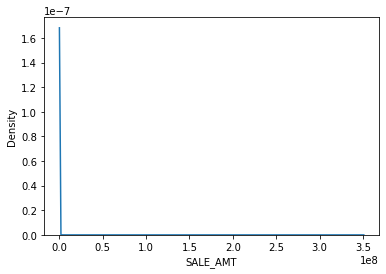

In [20]:
sns.kdeplot(x=tr_dtl_list_0['SALE_AMT'])

<AxesSubplot:title={'center':'correlation Heatmap'}>

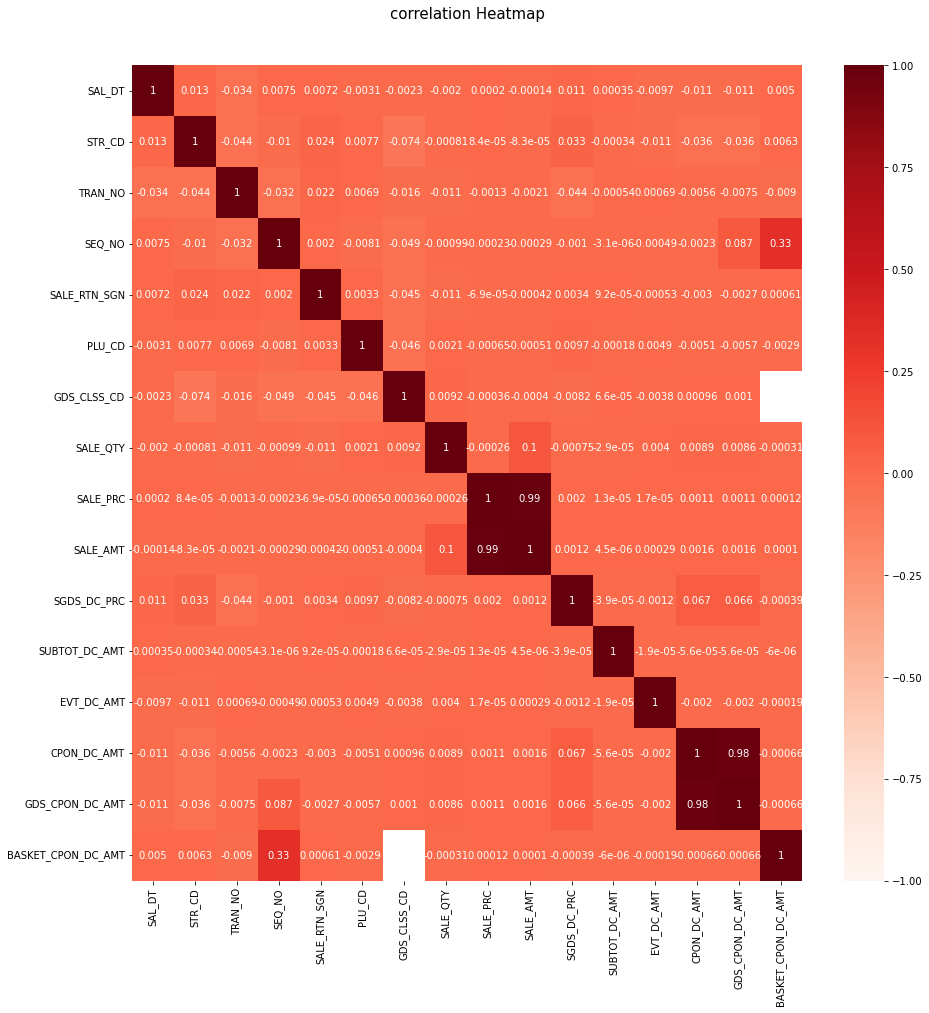

In [21]:
plt.figure(figsize=(15, 15))
plt.title('correlation Heatmap', y = 1.05, size = 15)
sns.heatmap(tr_dtl_list_0.corr(), cmap = 'Reds', vmin = -1, vmax=1, annot = True)